<a href="https://colab.research.google.com/github/thariqziyad/data-generation/blob/main/data_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [216]:
import pandas as pd
import numpy as np
from scipy.stats import truncnorm as t_norm
import warnings
import matplotlib.pyplot as plt

# Loading parameters

In [28]:
df = pd.read_csv('source.csv')
df.head()

,Mean,Std Dev
0,39583,",2041"
1,38750,",3378"
2,36667,",4815"
3,37500,",4423"
4,35000,",5108"


In [14]:
df.tail()

,Mean,Std Dev
51,31250,",4484"
52,30417,",3586"
53,32083,",4149"
54,30417,",4643"
55,30000,",4170"


In [15]:
df.info()
print("Max mean:",max(df.Mean),"Min mean:", min(df.Mean))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Mean     56 non-null     int64 
 1   Std Dev  56 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB
Max mean: 39583 Min mean: 28333


# Data cleaning

We see that neither columns is considered as Float. We make the necessary edits.

## Mean:
 Integers to floats

In [68]:
df2 = df.assign(Means=lambda x: x.Mean/10000).drop(columns='Mean')
df2.head()

,Std Dev,Means
0,",2041",3.9583
1,",3378",3.8750
2,",4815",3.6667
3,",4423",3.7500
4,",5108",3.5000


## Standard Deviation

String to floats

In [71]:
s_str = df2.loc[:,'Std Dev'].str[1:]
s_num = pd.to_numeric(s_str)

df3 = df2.assign(Std_dev=s_num/10000).drop(columns='Std Dev')
print(df3.shape)
df3.head()

(56, 2)


,Means,Std_dev
0,3.9583,0.2041
1,3.8750,0.3378
2,3.6667,0.4815
3,3.7500,0.4423
4,3.5000,0.5108


# Generating data

## Create function

To help ease coding

In [191]:
def data_gen(mu,std,responden=10):
  if std<0.2:
    warnings.warn('Standard deviation is less than 0.2; resulting mean and standard deviation may be less accurate.')
  a_trunc = 1
  b_trunc = 4
  a, b = (a_trunc - mu) / std, (b_trunc - mu) / std

  #initializing variables
  mu_dif = 5
  std_dif = 5
  iter = 0

  while mu_dif > 0.005 or std_dif > 0.005:
    # mu_init = np.mean(init_num)
    # std_init = np.std(init_num)
    random_numbers = t_norm.rvs(a, b, loc=mu, scale=std,size=responden)
    std_b = np.std(random_numbers)
    mu_b = np.mean(random_numbers)
    fin_num = mu + ((random_numbers-mu_b)*std/std_b)
    integers = np.round(fin_num).astype(int)
    mu_dif = abs(np.mean(integers)-mu)
    # mu_difi = abs(mu_init-mu)
    std_dif = abs(np.std(integers)-std)
    # std_difi = abs(std_init-std)
    # if mu_dif<mu_difi or std_dif<std_difi:
    #   fin_num=np.round(init_num).astype(int)
    # else:
    #   fin_num=init_num
    # init_num = random_numbers
    iter += 1
    if iter > 10000:
      break
  # print(iter)
  return integers


mu_1 = 3.9498
st_1 = 0.1988
res = data_gen(mu_1,st_1)

<ipython-input-191-2b301da800da>:3: UserWarning: Standard deviation is less than 0.2; resulting mean and standard deviation may be less accurate.
  warnings.warn('Standard deviation is less than 0.2; resulting mean and standard deviation may be less accurate.')


# Generate data

In [250]:
res_dict = {}
data_length = 155

range_1 = range(28)
range_2 = df3.index[29:]

for i in range_2:
  mu_gen = df3.Means[i]
  std_gen = df3.Std_dev[i]
  all_data =  data_gen(mu_gen,std_gen,data_length)
  res_dict[i] = [x for x in all_data]
  res_dict[i].append(mu_gen)
  res_dict[i].append(np.mean(all_data))
  res_dict[i].append(abs(mu_gen-np.mean(all_data)))
  res_dict[i].append(std_gen)
  res_dict[i].append(np.std(all_data))
  res_dict[i].append(abs(std_gen-np.std(all_data)))
  #print(res_dict[i])

#res_dict
data = pd.DataFrame.from_dict(res_dict)
compare_idx = {
    data_length:'Original mean',
    data_length+1:'Resulting mean',
    data_length+2:'Mean difference',
    data_length+3:'Original standard deviation',
    data_length+4:'Resulting standard deviation',
    data_length+5:'Standard deviation difference',
}
data.rename(index=compare_idx,inplace=True)
data.tail(10)

,29,30,31,32,33,34,35,36,37,38,...,46,47,48,49,50,51,52,53,54,55
151,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000
152,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000
153,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
154,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
Original mean,3.125000,3.041700,2.916700,2.916700,3.291700,3.125000,3.125000,3.041700,3.291700,3.166700,...,3.375000,3.375000,3.208300,3.291700,3.125000,3.125000,3.041700,3.208300,3.041700,3.000000
Resulting mean,3.122581,3.025806,2.916129,2.941935,3.277419,3.135484,3.141935,3.038710,3.316129,3.148387,...,3.393548,3.400000,3.238710,3.296774,3.122581,3.135484,3.038710,3.174194,3.045161,2.987097
Mean difference,0.002419,0.015894,0.000571,0.025235,0.014281,0.010484,0.016935,0.002990,0.024429,0.018313,...,0.018548,0.025000,0.030410,0.005074,0.002419,0.010484,0.002990,0.034106,0.003461,0.012903
Original standard deviation,0.337800,0.464300,0.653900,0.583600,0.550000,0.612400,0.448400,0.464300,0.550000,0.380700,...,0.575800,0.575800,0.414900,0.464300,0.612400,0.448400,0.358600,0.414900,0.464300,0.417000
Resulting standard deviation,0.398958,0.532170,0.652092,0.654894,0.657811,0.682287,0.525955,0.466751,0.598437,0.465501,...,0.606383,0.638547,0.509065,0.534901,0.615242,0.508983,0.357119,0.509882,0.604733,0.468176
Standard deviation difference,0.061158,0.067870,0.001808,0.071294,0.107811,0.069887,0.077555,0.002451,0.048437,0.084801,...,0.030583,0.062747,0.094165,0.070601,0.002842,0.060583,0.001481,0.094982,0.140433,0.051176


In [251]:
print('Maximum mean difference:',data.loc['Mean difference',:].max())
print('Maximum std difference:',data.loc['Standard deviation difference',:].max())
print('STD range: from',data.loc['Original standard deviation',:].min(),'to',data.loc['Original standard deviation',:].max())
print('Variable length:', data_length)

Maximum mean difference: 0.05702258064516119
Maximum std difference: 0.14043332415228332
STD range: from 0.3378 to 0.6539
Variable length: 155


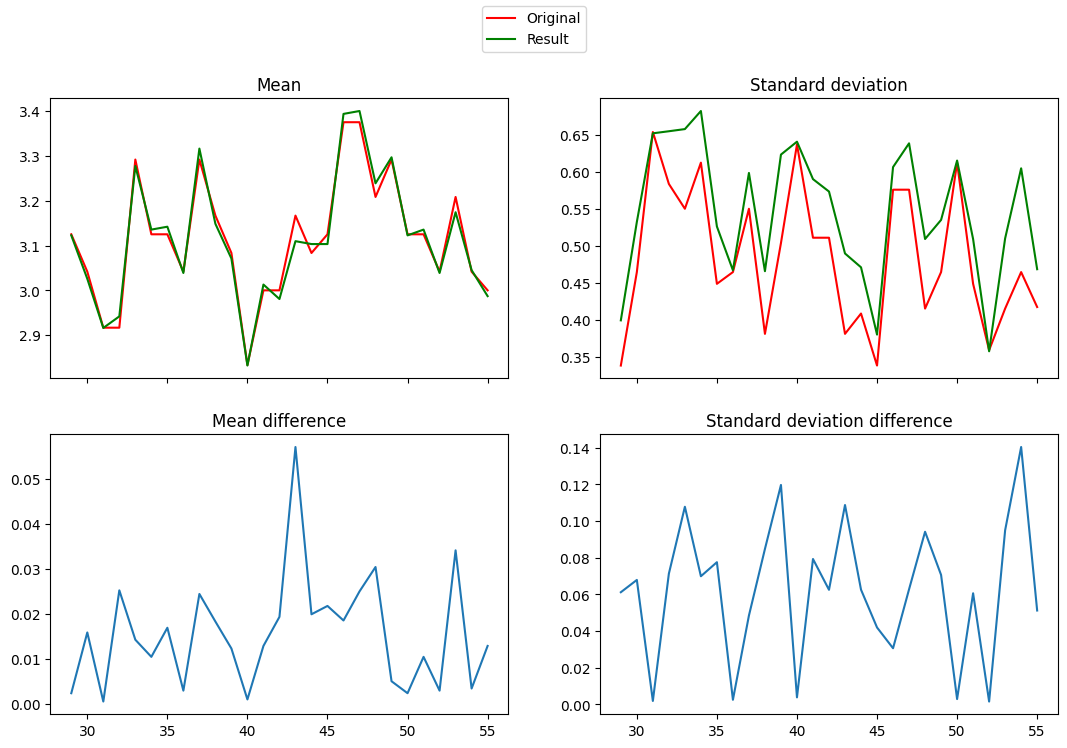

In [260]:
x = np.array(data.columns)
mu_ori = np.array([i for i in data.loc['Original mean',:]])
mu_res = np.array([i for i in data.loc['Resulting mean',:]])
mu_dif = np.array([i for i in data.loc['Mean difference',:]])
st_ori = np.array([i for i in data.loc['Original standard deviation',:]])
st_res = np.array([i for i in data.loc['Resulting standard deviation',:]])
st_dif = np.array([i for i in data.loc['Standard deviation difference',:]])

fig, ax = plt.subplots(2,2,sharex=True,figsize=(13,8))

ax[0,0].plot(x,mu_ori,color='red',label='Original')
ax[0,0].plot(x,mu_res,color='green',label='Result')
ax[0,0].set_title('Mean')
ax[1,0].plot(x,mu_dif)
ax[1,0].set_title('Mean difference')
ax[0,1].plot(x,st_ori,color='red')
ax[0,1].plot(x,st_res,color='green')
ax[0,1].set_title('Standard deviation')
ax[1,1].plot(x,st_dif)
ax[1,1].set_title('Standard deviation difference')

fig.legend(loc='upper center')

#Results

## Check results

Just something to help me understand how the code works

In [237]:
mu=df3.Means[4]
std=df3.Std_dev[4]
fin = data_gen(mu,std,data_length) #data.iloc[:100,0]

print("Desired Standard Deviation:", std)
print("Actual Standard Deviation of Generated Integers:", np.std(fin))
print("Standard Deviation difference:",abs(np.std(fin)-std))
print("Desired Mean:", mu)
print("Actual Mean of Generated Integers:", np.mean(fin))
print("Mean difference:",abs(np.mean(fin)-mu))
print(fin.max(),fin.min())
print(set(fin))

Desired Standard Deviation: 0.5108
Actual Standard Deviation of Generated Integers: 0.5744345045346771
Standard Deviation difference: 0.06363450453467712
Desired Mean: 3.5
Actual Mean of Generated Integers: 3.505
Mean difference: 0.004999999999999893
4 1
{1, 2, 3, 4}


## Write CSV file

In [211]:
data.to_csv(path_or_buf='data.csv',index=False)